### Importando dados

In [4]:
import pandas as pd

resenha = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Base de dados/imdb-reviews-pt-br.csv")

resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg  
4  Filmes de fotos de latão não é uma palavra apr...       neg

In [5]:
print(resenha.value_counts("sentiment"))

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [6]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg  
4  Filmes de fotos de latão não é uma palavra apr...       neg

### Definindo neg = 0 pos = 1

In [7]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])
classificacao.head()

/tmp/ipython-input-1386285043.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])


0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [8]:
resenha["classificacao"] = classificacao
resenha.tail()

id                                            text_en  \
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao  
49454              1  
49455              1  
49456              1  
49457              1  
49458              1

### Bag of words - entendendo o funcinamento

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

In [10]:
vetorizar.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [11]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [12]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                           columns=vetorizar.get_feature_names_out())

In [13]:
matriz_esparsa

Assisti  filme  ruim  um  ótimo
0        1      1     0   1      1
1        1      1     1   1      0

Bag of words - aplicando no caso real

In [14]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha["text_pt"])
print(bag_of_words.shape)

(49459, 50)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)

  regressao_logistica = LogisticRegression(solver = "lbfgs")
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)


print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


### Criando uma visualização

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud

todas_palavras = " ".join([texto for texto in resenha["text_pt"]])

In [17]:
len(todas_palavras)

63448424

In [18]:
nuvem_palavras = WordCloud(width=800, height=500,
                          random_state=21, max_font_size=110, collocations = False).generate(todas_palavras)

In [19]:
nuvem_palavras

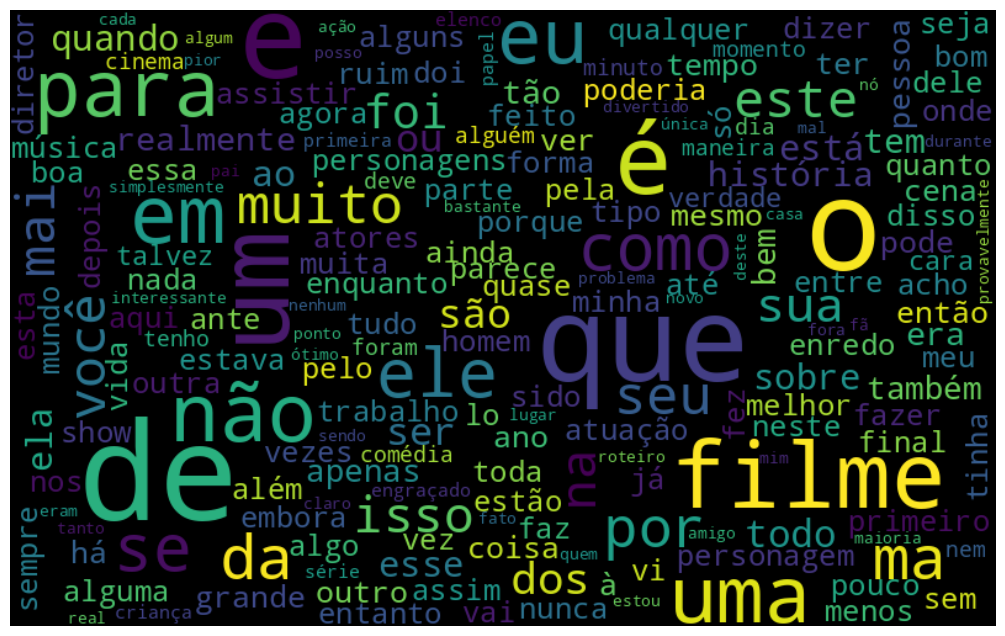

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.imshow(nuvem_palavras, interpolation="bilinear")
plt.axis("off")
plt.show()

### Criando filtros com o .query para criação da CloudWord positiva e negativa

In [21]:
def nuvem_palavras_negativas(texto, coluna_texto):

  texto_neg = texto.query("sentiment == 'neg'")

  todas_palavras = " ".join([texto for texto in texto_neg[coluna_texto]])

  nuvem_palavras = WordCloud(width=800, height=500,
                            random_state=21, max_font_size=110, collocations = False).generate(todas_palavras)

  plt.figure(figsize=(15,8))
  plt.imshow(nuvem_palavras, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [22]:
def nuvem_palavras_positivo(texto, coluna_texto):

  texto_positivo = texto.query("sentiment == 'pos'")

  todas_palavras = " ".join([texto for texto in texto_positivo[coluna_texto]])

  nuvem_palavras = WordCloud(width=800, height=500,
                            random_state=21, max_font_size=110, collocations = False).generate(todas_palavras)

  plt.figure(figsize=(15,8))
  plt.imshow(nuvem_palavras, interpolation="bilinear")
  plt.axis("off")
  plt.show()

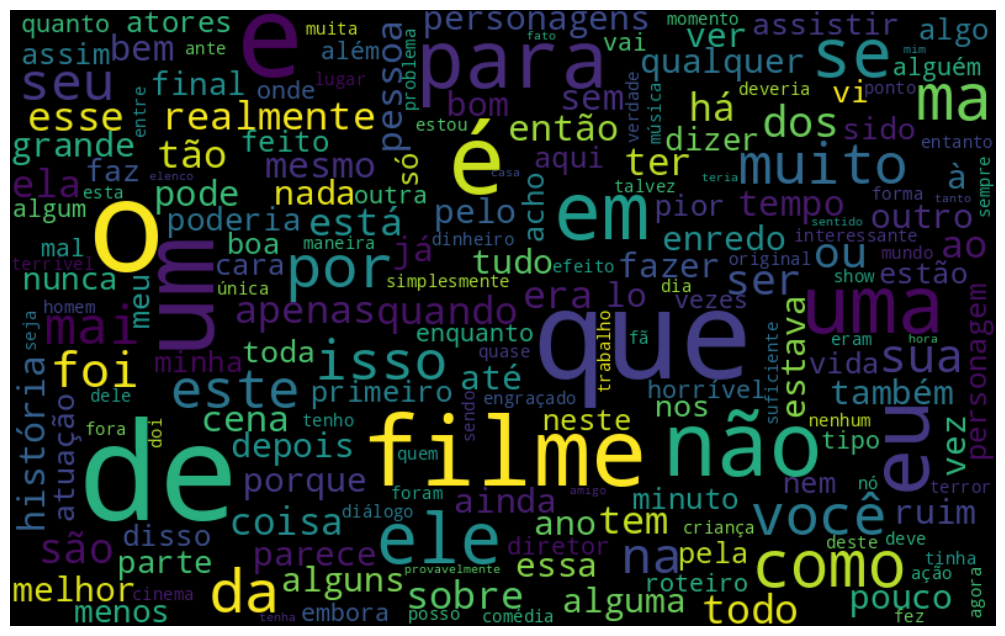

In [23]:
nuvem_palavras_negativas(resenha, "text_pt")

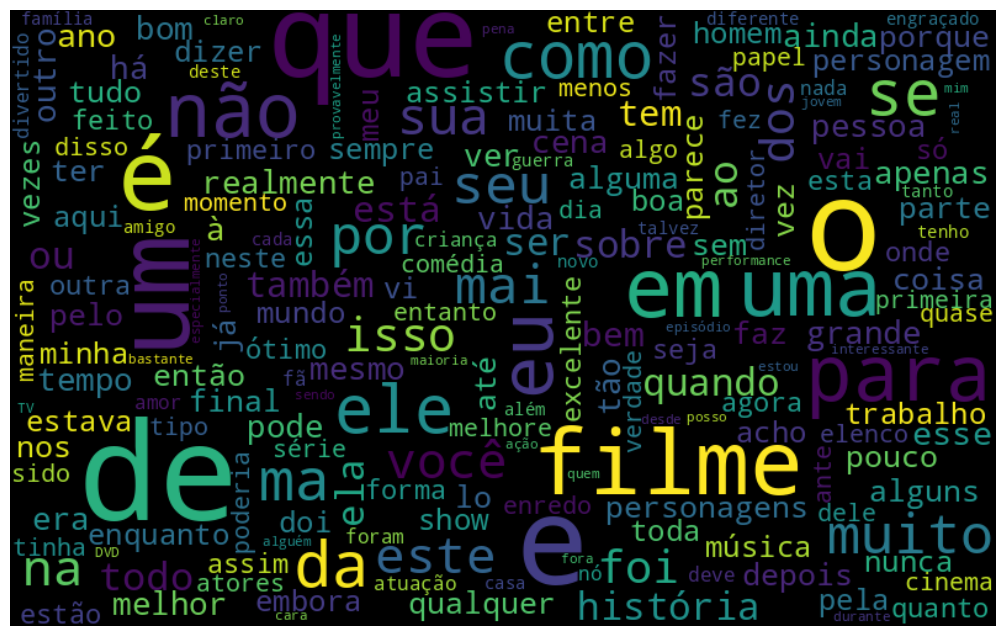

In [24]:
nuvem_palavras_positivo(resenha, "text_pt")

### Entendendo o funcionamento do nltk

In [25]:
import nltk

frase = ["um filme bom", "um filme ruim"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [26]:
from nltk import tokenize

frase = 'Isso é um teste'

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Isso', 'é', 'um', 'teste']


### Aplicando a tokenização

In [27]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
frequencia.most_common(10)

[('de', 417651),
 ('que', 325070),
 ('e', 299743),
 ('o', 244881),
 ('um', 216410),
 ('a', 210179),
 ('é', 192381),
 ('em', 132778),
 ('uma', 130888),
 ('não', 127915)]

In [28]:
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                              "Frequencia": list(frequencia.values())})

In [29]:
df_frequencia.nlargest(columns = "Frequencia", n = 10)

Palavra  Frequencia
20       de      417651
14      que      325070
42        e      299743
3         o      244881
7        um      216410
102       a      210179
45        é      192381
200      em      132778
1       uma      130888
29      não      127915

### Criando uma visualização das palavras mais frequentes

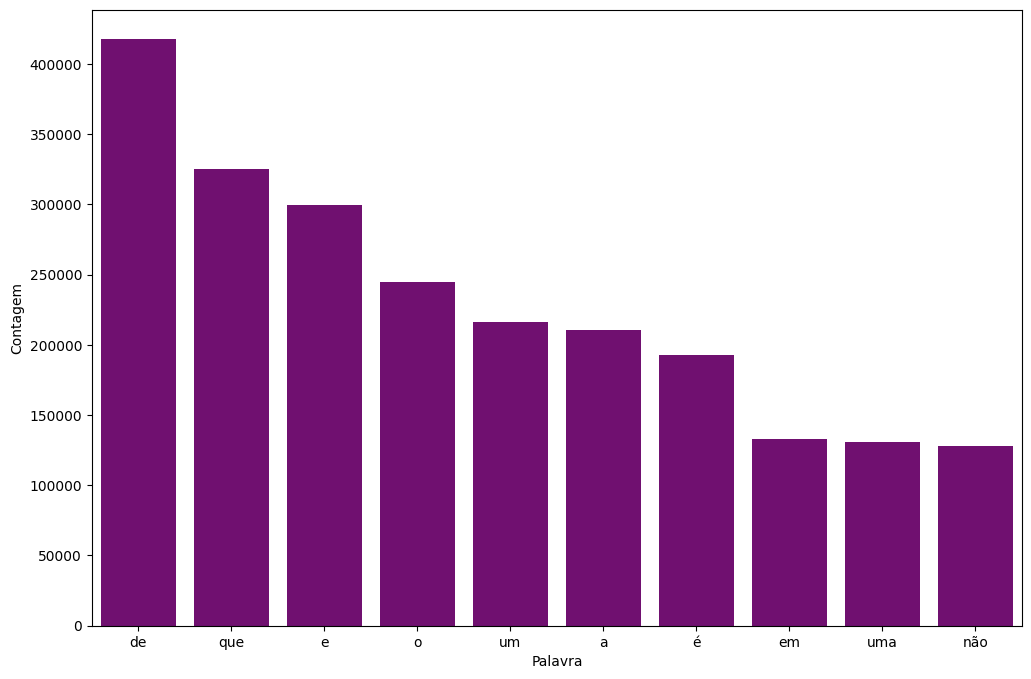

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequencia": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequencia", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequencia", color = 'purple')
    ax.set(ylabel = "Contagem")
    plt.show()

pareto(resenha, "text_pt", 10)

### Tratando as stop-words

In [31]:
import nltk

nltk.download("stopwords")

stop_words = nltk.corpus.stopwords.words("portuguese")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0  
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0  
4  Filmes de fotos de latão não é uma palavra apr...       neg              0

In [33]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_1"] = frase_processada

In [34]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  
0  Mais vez, Sr. Costner arrumou filme tempo nece...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis, poderiam agi...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada eles, ve...

In [35]:
classificar_texto(resenha, "tratamento_1", "classificacao")

0.6810351799433886

### Criando a visualização com o primeiro tratamento

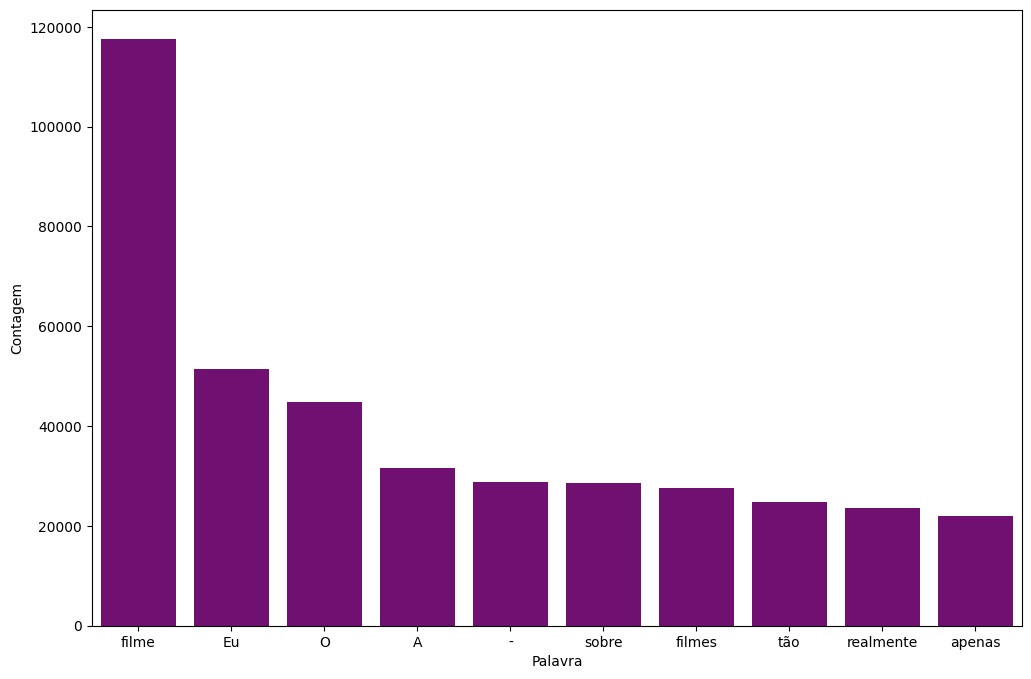

In [36]:
pareto(resenha, "tratamento_1", 10)

### Entendendo como funciona a retirada da pontuação


In [37]:
frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


In [38]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + stop_words

frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_2"] = frase_processada


In [39]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada verdade ...

In [40]:
resenha["tratamento_1"][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [41]:
resenha["tratamento_2"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

### Entendendo a retirada de acentos

In [42]:
!pip install unidecode
import unidecode

acentos = "ótimo péssimo"
print(unidecode.unidecode(acentos))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 3.7 MB/s eta 0:00:00
otimo pessimo


### Aplicando a retirada dos acentos

In [43]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [44]:
stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [45]:
resenha["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_3"] = frase_processada

In [46]:
resenha["tratamento_3"][0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [47]:
acuracia_tratamento3 = classificar_texto(resenha, "tratamento_3", "classificacao")
print(acuracia_tratamento3)

0.6887990295188031


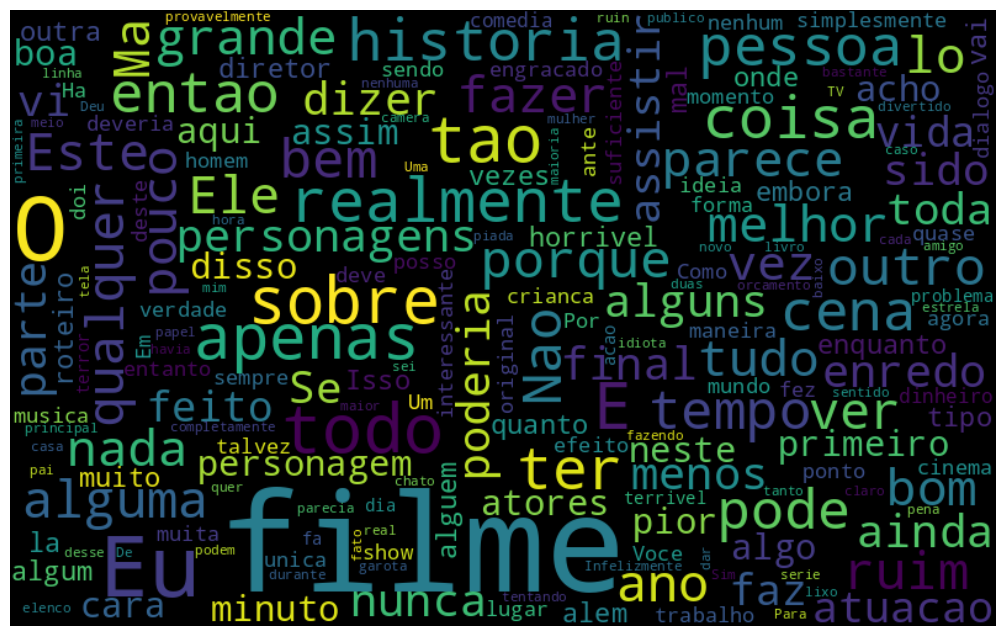

In [48]:
nuvem_palavras_negativas(resenha, "tratamento_3")

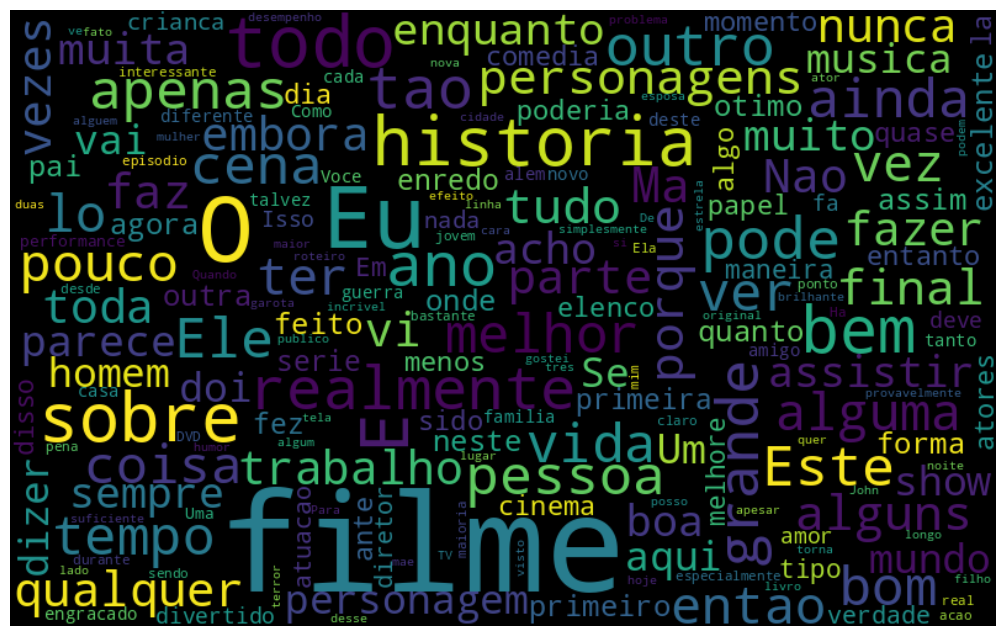

In [49]:
nuvem_palavras_positivo(resenha, "tratamento_3")

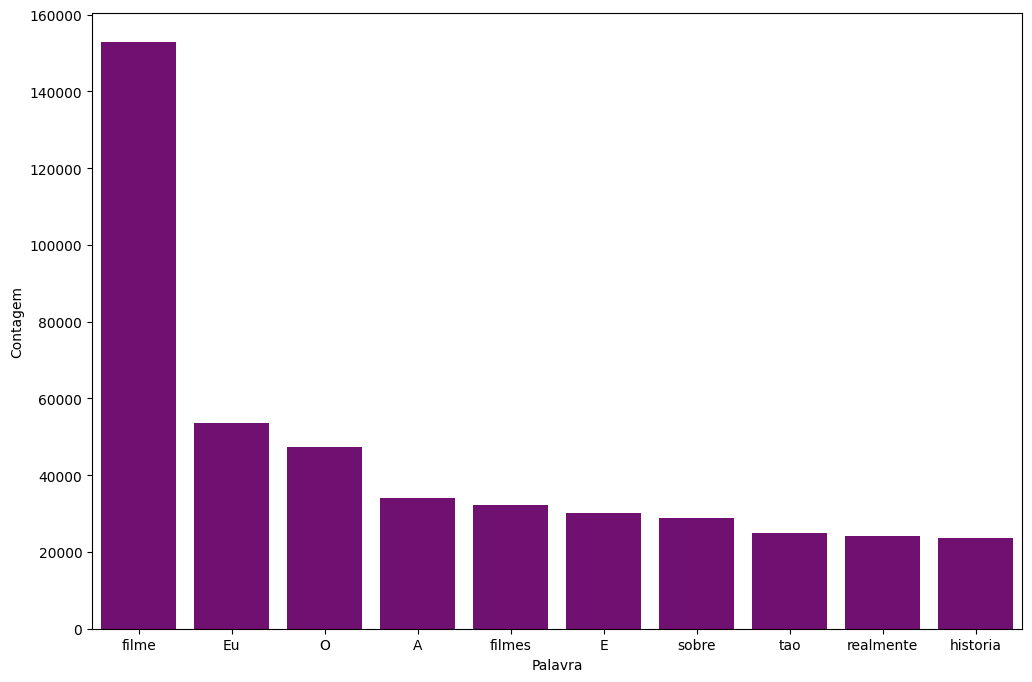

In [50]:
pareto(resenha, "tratamento_3", 10)

### Aplicando letras minúsculas

In [51]:
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acentos:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_4"] = frase_processada

In [52]:
resenha["tratamento_4"][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [53]:
acuracia_tratamento4 = classificar_texto(resenha, "tratamento_4", "classificacao")
print(acuracia_tratamento4)


0.688071168621108


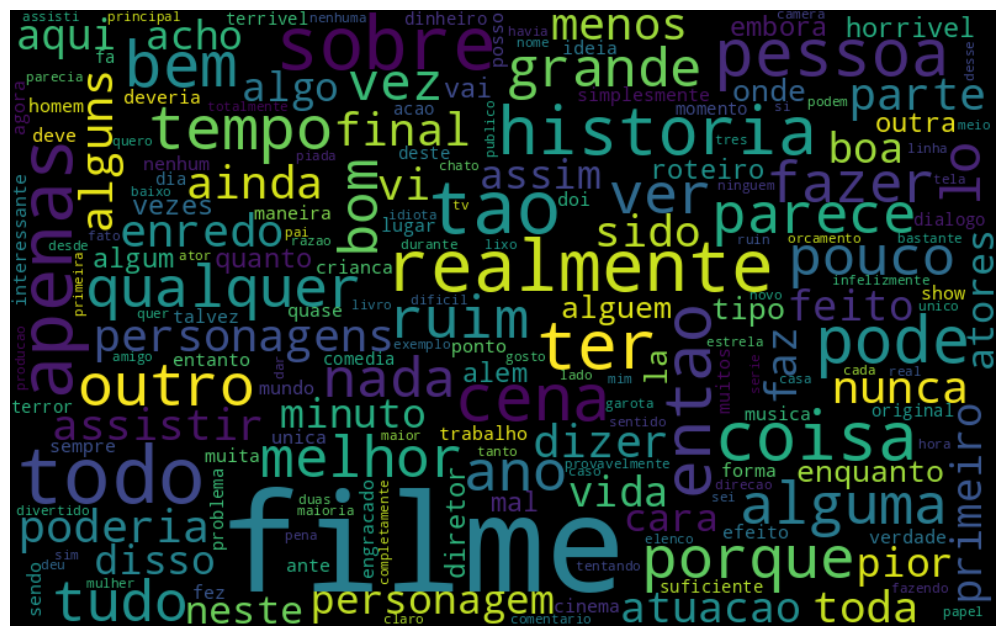

In [54]:
nuvem_palavras_negativas(resenha, "tratamento_4")

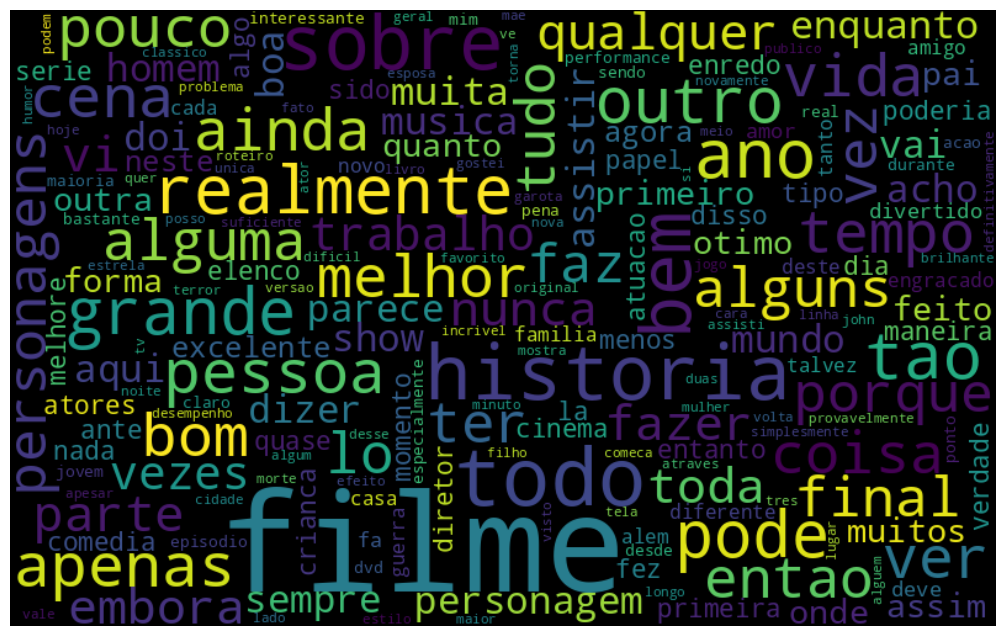

In [55]:
nuvem_palavras_positivo(resenha, "tratamento_4")

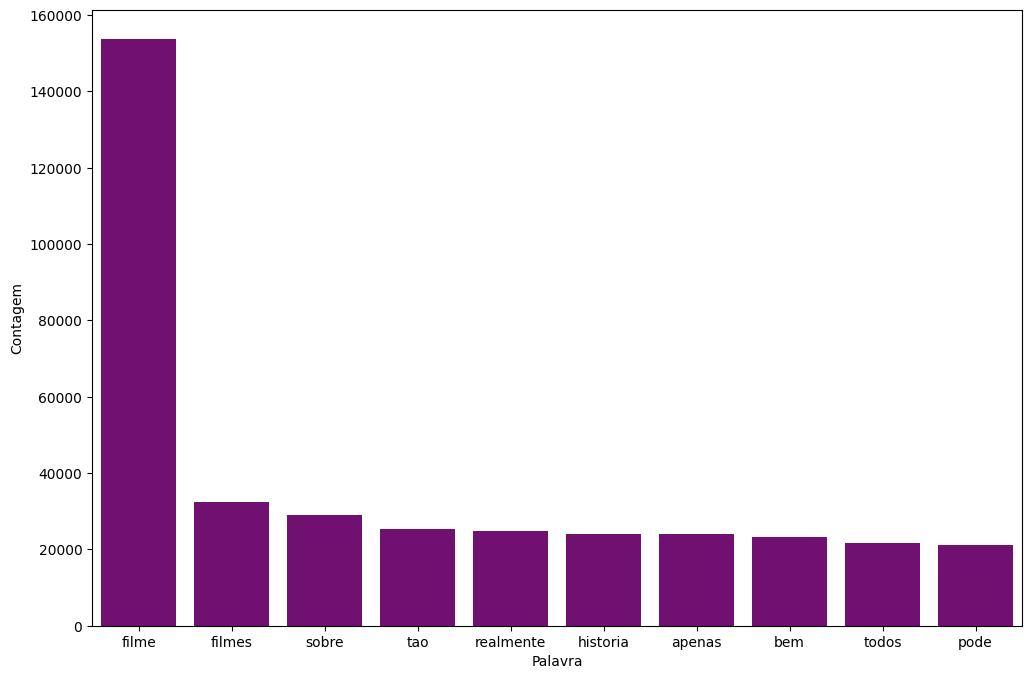

In [56]:
pareto(resenha, "tratamento_4", 10)

### Entendendo o stemmer

In [57]:
from nltk.stem import RSLPStemmer

nltk.download('rslp')

stemmer = RSLPStemmer()
print(stemmer.stem("correr"))
print(stemmer.stem("correndo"))
print(stemmer.stem("corri"))


corr
corr
corr


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


### Aplicando o stemmer

In [58]:
frase_processada = list()
for opiniao in resenha["tratamento_4"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_5"] = frase_processada

In [59]:
acuracia_tratamento5 = classificar_texto(resenha, "tratamento_5", "classificacao")
print(acuracia_tratamento4)
print(acuracia_tratamento5)

0.688071168621108
0.6955923978972908


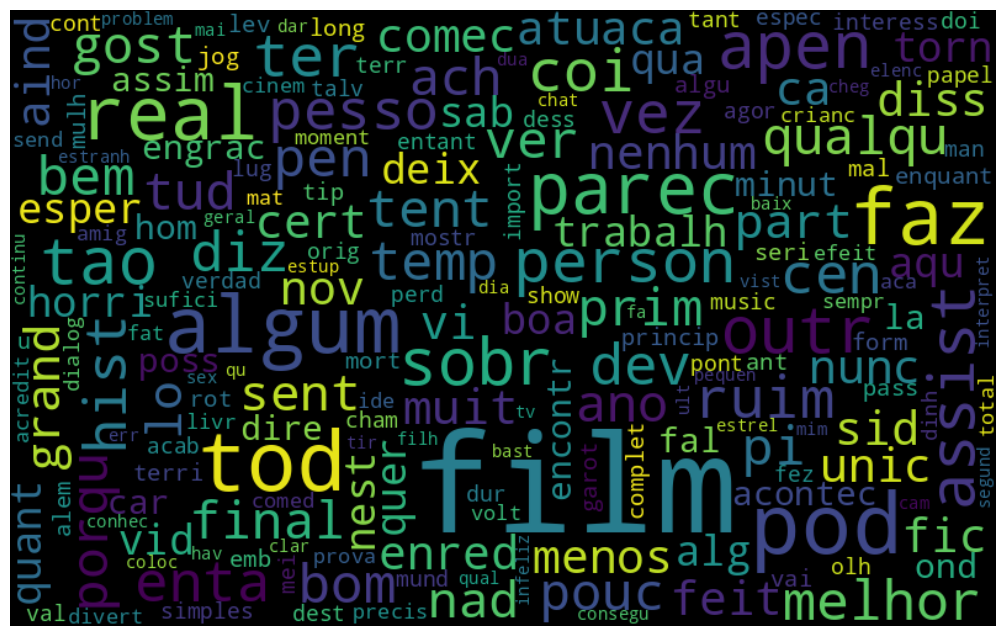

In [60]:
nuvem_palavras_negativas(resenha, "tratamento_5")

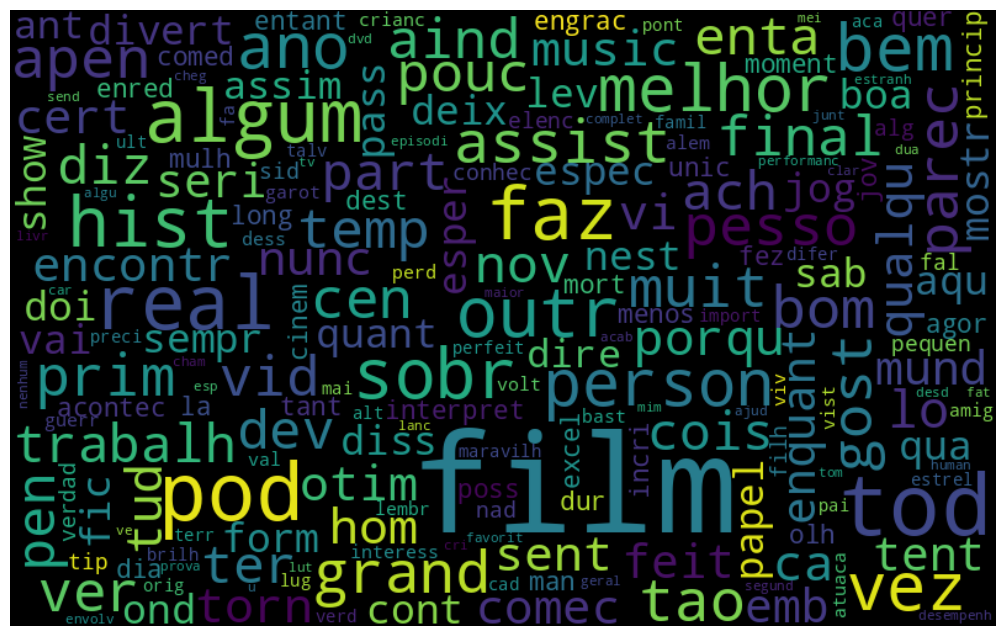

In [61]:
nuvem_palavras_positivo(resenha, "tratamento_5")

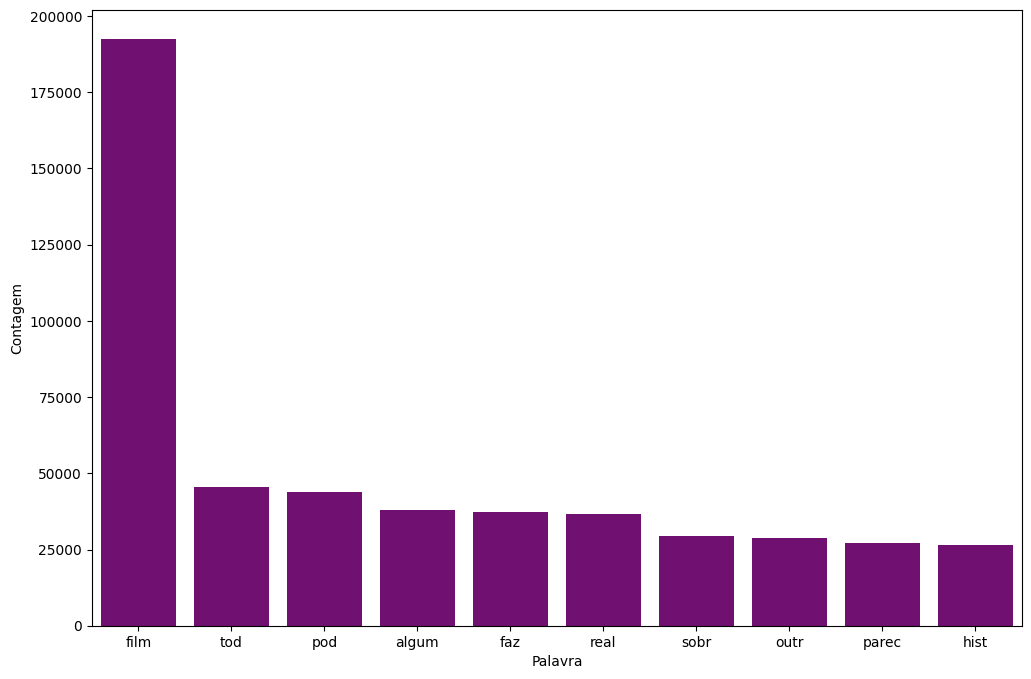

In [62]:
pareto(resenha, "tratamento_5", 10)

### Entendendo a vetorização

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
import pandas as pd
frases = ["Assisti um filme ótimo", "Assisti um filme ruim"]

tfidf = TfidfVectorizer(lowercase=False, max_features=50)
caract = tfidf.fit_transform(frases)
pd.DataFrame(caract.todense(),
             columns=tfidf.get_feature_names_out())

Assisti     filme      ruim        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

### Aplicando

In [66]:
tfidf_bruto = tfidf.fit_transform(resenha["text_pt"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                              resenha["classificacao"],
                                                              random_state = 42)

regressao_logistica = LogisticRegression(solver = "lbfgs")
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6604933279417712


In [67]:
tfidf_tratados = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                              resenha["classificacao"],
                                                              random_state = 42)

regressao_logistica = LogisticRegression(solver = "lbfgs")
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.6964820056611403


### Entendendo ngrams


In [72]:
from nltk import ngrams

frase = "assisti um ótimo filme."
frase_separada = token_pontuacao.tokenize(frase)
pares = ngrams(frase_separada, 2)
print(list(pares))


[('assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme'), ('filme', '.')]


### Aplicando ngrams

In [75]:
tdidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tdidf.fit_transform(resenha["tratamento_5"])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.886696320258795


In [77]:
tdidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tdidf.fit_transform(resenha["tratamento_5"])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf)

0.884270117266478


In [80]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tdidf.get_feature_names_out()
)
pesos.nlargest(10, columns=0)

0
otim      8.215092
excel     7.903823
perfeit   6.521988
favorit   5.768388
maravilh  5.241512
incri     4.934224
hilari    4.735206
divert    4.486934
ador      4.398724
brilh     4.228919

In [81]:
pesos.nsmallest(10, columns=0)

0
ruim      -9.174821
pi        -9.116361
horri     -8.681671
terri     -7.090521
chat      -6.844734
nad       -5.965650
infeliz   -5.276438
decepca   -5.128793
ridicul   -4.992068
decepcion -4.984749